In [ ]:
# Resnet50 results and confusion matrix

import pickle as pkl
from tensorflow.keras.models import load_model
import tensorflow as tf
from sklearn.metrics import f1_score, classification_report
from keras import backend as K
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np

In [ ]:
# Resnet50 results and confusion matrix

import pickle as pkl
from tensorflow.keras.models import load_model
import tensorflow as tf
from sklearn.metrics import f1_score, classification_report
from keras import backend as K
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np

# testing set
with open("/content/drive/MyDrive/Thesis_work/train, val and test sets/test_normalized.pkl", "rb") as f:
    x_test, y_test = pkl.load(f)
    print("testing set loaded")

def recall_m(y_true, y_pred): # suitable only for binary classification?
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Define class labels
class_labels = {
    0: 'Ahegao',
    1: 'Angry',
    2: 'Happy',
    3: 'Neutral',
    4: 'Sad',
    5: 'Surprise'
}

tf.keras.utils.get_custom_objects()['f1_m'] = f1_m
tf.keras.utils.get_custom_objects()['precision_m'] = precision_m
tf.keras.utils.get_custom_objects()['recall_m'] = recall_m

testing set loaded


model loaded
97/97 [==============================] - 202s 2s/step
F1 Score: [0.60573477 0.19354839 0.49362688 0.40333135 0.36363636 0.29850746]
F1 Score weighted: 0.4051
F1 Score macro: 0.3931
F1 Score micro: 0.4190
              precision    recall  f1-score   support

      Ahegao       0.53      0.70      0.61       240
       Angry       0.37      0.13      0.19       252
       Happy       0.43      0.57      0.49       741
     Neutral       0.39      0.42      0.40       815
         Sad       0.40      0.34      0.36       799
    Surprise       0.38      0.25      0.30       244

    accuracy                           0.42      3091
   macro avg       0.42      0.40      0.39      3091
weighted avg       0.41      0.42      0.41      3091



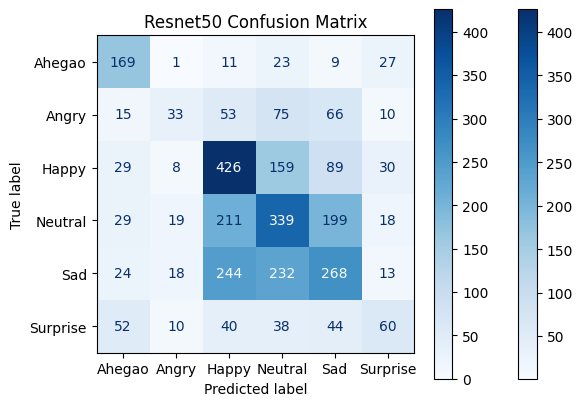

In [ ]:


# loading model
model = load_model("/content/drive/MyDrive/Thesis_work/Models/resnet50_50epochsmodel.h5")
print("model loaded")

# Assuming 'model' is your trained model
predictions = model.predict(x_test)

# Convert probabilities to class labels (if necessary)
predicted_classes = predictions.argmax(axis=1)

# Compute F1 score

true_labels = []
for array in y_test:
  for i in range(len(array)):
    if array[i] == 1:
      #print(i)
      true_labels.append(i)

# Convert class labels to class names
true_labels = [class_labels[label] for label in true_labels]
predicted_classes = [class_labels[label] for label in predicted_classes]

f1_weighted = f1_score(true_labels, predicted_classes, average="weighted")
f1 = f1_score(true_labels, predicted_classes, average=None)
f1_macro = f1_score(true_labels, predicted_classes, average="macro")
f1_micro = f1_score(true_labels, predicted_classes, average="micro")

print(f"F1 Score: {f1}")
print(f"F1 Score weighted: {f1_weighted:.4f}")
print(f"F1 Score macro: {f1_macro:.4f}")
print(f"F1 Score micro: {f1_micro:.4f}")

# print classification report
print(classification_report(true_labels, predicted_classes))

# Initizalizing the confusion matrix
confusion_matrix = metrics.confusion_matrix(true_labels, predicted_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Ahegao", "Angry", "Happy", "Neutral", "Sad", "Surprise"])

# Create a colormap with normalization
cmap = plt.cm.Blues
norm = Normalize(vmin=0, vmax=confusion_matrix.max())

# Plotting confusion matrix with custom color scheme
fig, ax = plt.subplots()
cm_display.plot(cmap=cmap, ax=ax)
# Use the colormap and normalization for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax)
plt.title("Resnet50 Confusion Matrix")
plt.show()

In [ ]:
# InceptionV3 model

# loading model
model = load_model("/content/drive/MyDrive/Thesis_work/Models/inceptionv3_50epochsmodel.h5")
print("model loaded")

# Assuming 'model' is your trained model
predictions = model.predict(x_test)

# Convert probabilities to class labels (if necessary)
predicted_classes = predictions.argmax(axis=1)

# Compute F1 score

true_labels = []
for array in y_test:
  for i in range(len(array)):
    if array[i] == 1:
      #print(i)
      true_labels.append(i)

# Convert class labels to class names
true_labels = [class_labels[label] for label in true_labels]
predicted_classes = [class_labels[label] for label in predicted_classes]

f1_weighted = f1_score(true_labels, predicted_classes, average="weighted")
f1 = f1_score(true_labels, predicted_classes, average=None)
f1_macro = f1_score(true_labels, predicted_classes, average="macro")
f1_micro = f1_score(true_labels, predicted_classes, average="micro")

print(f"F1 Score: {f1}")
print(f"F1 Score weighted: {f1_weighted:.4f}")
print(f"F1 Score macro: {f1_macro:.4f}")
print(f"F1 Score micro: {f1_micro:.4f}")

# print classification report
print(classification_report(true_labels, predicted_classes))

# Initizalizing the confusion matrix
confusion_matrix_inceptionv3 = metrics.confusion_matrix(true_labels, predicted_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_inceptionv3, display_labels=["Ahegao", "Angry", "Happy", "Neutral", "Sad", "Surprise"])

# Plotting confusion matrix with custom color scheme
cm_display.plot(cmap='Blues', vmin=0, vmax=confusion_matrix_autokeras.max())  # Adjust vmin and vmax as needed
plt.title("Autokeras Confusion Matrix")
#plt.grid(False)
plt.show()

model loaded
97/97 [==============================] - 100s 1s/step
F1 Score: [0.77559055 0.23708207 0.6219765  0.55162659 0.47050462 0.43783784]
F1 Score weighted: 0.5303
F1 Score macro: 0.5158
F1 Score micro: 0.5445
              precision    recall  f1-score   support

      Ahegao       0.74      0.82      0.78       240
       Angry       0.51      0.15      0.24       252
       Happy       0.64      0.61      0.62       741
     Neutral       0.45      0.72      0.55       815
         Sad       0.54      0.41      0.47       799
    Surprise       0.64      0.33      0.44       244

    accuracy                           0.54      3091
   macro avg       0.59      0.51      0.52      3091
weighted avg       0.56      0.54      0.53      3091



NameError: name 'confusion_matrix_autokeras' is not defined

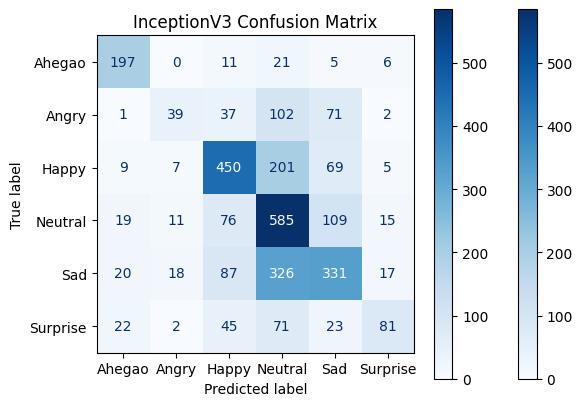

In [ ]:
# Initizalizing the confusion matrix
confusion_matrix_inceptionv3 = metrics.confusion_matrix(true_labels, predicted_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_inceptionv3, display_labels=["Ahegao", "Angry", "Happy", "Neutral", "Sad", "Surprise"])


# Create a colormap with normalization
cmap = plt.cm.Blues
norm = Normalize(vmin=0, vmax=confusion_matrix_inceptionv3.max())

# Plotting confusion matrix with custom color scheme
fig, ax = plt.subplots()
cm_display.plot(cmap=cmap, ax=ax)
# Use the colormap and normalization for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax)
plt.title("InceptionV3 Confusion Matrix")
plt.show()

model loaded
97/97 [==============================] - 668s 7s/step
F1 Score: [0.84913793 0.40217391 0.70694087 0.60434057 0.55390575 0.61607143]
F1 Score weighted: 0.6194
F1 Score macro: 0.6221
F1 Score micro: 0.6247
              precision    recall  f1-score   support

      Ahegao       0.88      0.82      0.85       240
       Angry       0.64      0.29      0.40       252
       Happy       0.67      0.74      0.71       741
     Neutral       0.55      0.67      0.60       815
         Sad       0.57      0.54      0.55       799
    Surprise       0.68      0.57      0.62       244

    accuracy                           0.62      3091
   macro avg       0.67      0.60      0.62      3091
weighted avg       0.63      0.62      0.62      3091



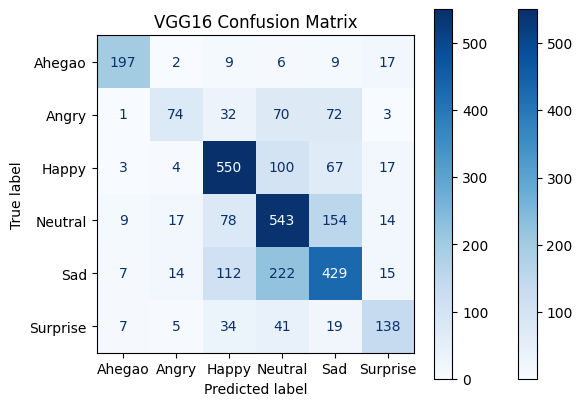

In [ ]:
# VGG16

# loading model
model = load_model("/content/drive/MyDrive/Thesis_work/Models/vgg16_50epochsmodel.h5")
print("model loaded")

# Assuming 'model' is your trained model
predictions = model.predict(x_test)

# Convert probabilities to class labels (if necessary)
predicted_classes = predictions.argmax(axis=1)

# Compute F1 score

true_labels = []
for array in y_test:
  for i in range(len(array)):
    if array[i] == 1:
      #print(i)
      true_labels.append(i)

# Convert class labels to class names
true_labels = [class_labels[label] for label in true_labels]
predicted_classes = [class_labels[label] for label in predicted_classes]

f1_weighted = f1_score(true_labels, predicted_classes, average="weighted")
f1 = f1_score(true_labels, predicted_classes, average=None)
f1_macro = f1_score(true_labels, predicted_classes, average="macro")
f1_micro = f1_score(true_labels, predicted_classes, average="micro")

print(f"F1 Score: {f1}")
print(f"F1 Score weighted: {f1_weighted:.4f}")
print(f"F1 Score macro: {f1_macro:.4f}")
print(f"F1 Score micro: {f1_micro:.4f}")

# print classification report
print(classification_report(true_labels, predicted_classes))

# Initizalizing the confusion matrix
confusion_matrix_vgg16 = metrics.confusion_matrix(true_labels, predicted_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_vgg16, display_labels = ["Ahegao", "Angry", "Happy", "Neutral", "Sad", "Surprise"])

# Create a colormap with normalization
cmap = plt.cm.Blues
norm = Normalize(vmin=0, vmax=confusion_matrix_vgg16.max())

# Plotting confusion matrix with custom color scheme
fig, ax = plt.subplots()
cm_display.plot(cmap=cmap, ax=ax)
# Use the colormap and normalization for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax)
plt.title("VGG16 Confusion Matrix")
plt.show()

In [ ]:
import statistics

resnet50_scores = [0.60, 0.19, 0.50, 0.40, 0.36, 0.31]
inceptionv3_scores = [0.78, 0.24, 0.62, 0.55, 0.47, 0.44]
vgg16_scores = [0.85, 0.40, 0.71, 0.60, 0.55, 0.62]

print("resnet50 variance: ", statistics.variance(resnet50_scores))
print("inceptionv3 variance: ", statistics.variance(inceptionv3_scores))
print("vgg16 variance: ", statistics.variance(vgg16_scores))

resnet50 variance:  0.020706666666666665
inceptionv3 variance:  0.03314666666666667
vgg16 variance:  0.02293666666666666
